In [13]:
# Complementary Slackness Condition Tutorial
# Using a 2D Linear Programming Example

### Complementary slackness

**Complementary Slackness in Optimization**

Complementary slackness is a critical concept in **duality theory** for **convex optimization**, establishing necessary conditions for optimality when dealing with inequality constraints. It essentially provides a way to link primal and dual problems, especially when inequality constraints are involved.

### Mathematical Formulation
Consider an optimization problem with an inequality constraint:

$$
\min f(x) \quad \text{subject to} \quad g(x) \leq 0
$$

In the corresponding **Lagrange dual formulation**, we introduce a **Lagrange multiplier** \( \lambda \geq 0 \) for the inequality constraint \( g(x) \leq 0 \). The complementary slackness condition for optimality requires that:

$$
\lambda \cdot g(x) = 0
$$

This condition has two implications:
1. **If the primal constraint is inactive** (i.e., \( g(x) < 0 \)), then the dual variable (multiplier) **must be zero**: \( \lambda = 0 \).
2. **If the dual variable is positive** (\( \lambda > 0 \)), then the corresponding **primal constraint must be binding**, meaning it’s exactly at the boundary: \( g(x) = 0 \).

### Why It’s Important
In simpler terms, complementary slackness ensures that we’re not assigning a “price” (dual variable) to constraints unless they’re precisely at their limits in the optimal solution. This idea is fundamental in **sensitivity analysis** and **interpreting dual variables** as shadow prices, as it helps to understand which constraints are influential in determining the optimal solution.




In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

## SECTION 1: Introduction to Complementary Slackness
Complementary Slackness is a fundamental concept in optimization theory that provides 
a relationship between primal and dual solutions in linear programming.

The condition states that for optimal solutions:
- If a constraint is not binding (slack > 0), then its corresponding dual variable must be zero
- If a dual variable is positive, then its corresponding primal constraint must be binding (slack = 0)

We'll demonstrate this using a simple 2D example.

## SECTION 2: Problem Setup
Consider the following linear programming problem:

Minimize:    z = 2x₁ + 3x₂
Subject to:  x₁ + x₂ ≥ 4     (constraint 1)
             2x₁ + x₂ ≥ 5     (constraint 2)
             x₁, x₂ ≥ 0

We'll solve this problem and examine the complementary slackness conditions.

In [17]:
# Define the problem parameters
c = np.array([2, 3])  # Objective function coefficients
A = np.array([[-1, -1], [-2, -1]])  # Constraint coefficients (negative for ≥ constraints)
b = np.array([-4, -5])  # Right-hand side (negative for ≥ constraints)

# Solve the linear program using the HiGHS method
result = linprog(c, A_ub=A, b_ub=b, method='highs')
x_optimal = result.x
print("\nOptimal Solution:")
print(f"x₁ = {x_optimal[0]:.2f}")
print(f"x₂ = {x_optimal[1]:.2f}")
print(f"Optimal value = {result.fun:.2f}")


Optimal Solution:
x₁ = 4.00
x₂ = 0.00
Optimal value = 8.00


## SECTION 3: Visualization

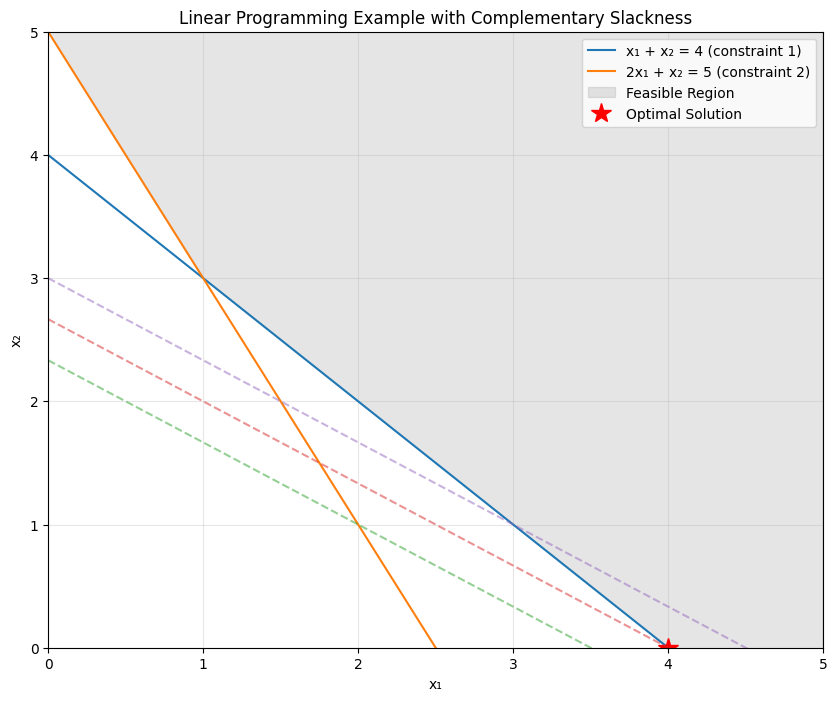

In [18]:
def plot_constraints_and_solution():
    x1 = np.linspace(0, 6, 100)
    
    # Plot constraints
    plt.figure(figsize=(10, 8))
    plt.plot(x1, 4-x1, label='x₁ + x₂ = 4 (constraint 1)')
    plt.plot(x1, 5-2*x1, label='2x₁ + x₂ = 5 (constraint 2)')
    
    # Fill feasible region
    x1_fill = np.linspace(0, 5, 100)
    plt.fill_between(x1_fill, 
                    np.maximum(4-x1_fill, 5-2*x1_fill),
                    8*np.ones_like(x1_fill),
                    alpha=0.2,
                    color='gray',
                    label='Feasible Region')
    
    # Plot optimal solution
    plt.plot(x_optimal[0], x_optimal[1], 'r*', markersize=15, label='Optimal Solution')
    
    # Plot objective function level lines
    z_optimal = 2*x_optimal[0] + 3*x_optimal[1]
    for z in [z_optimal-1, z_optimal, z_optimal+1]:
        plt.plot(x1, (z - 2*x1)/3, '--', alpha=0.5)
    
    plt.grid(True, alpha=0.3)
    plt.xlabel('x₁')
    plt.ylabel('x₂')
    plt.title('Linear Programming Example with Complementary Slackness')
    plt.legend()
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    plt.show()

plot_constraints_and_solution()

## SECTION 4: Checking Complementary Slackness

In [19]:
"""
Let's verify the complementary slackness conditions:
1. Calculate slack variables for each constraint
2. Examine dual variables
3. Verify the complementary slackness conditions
"""

# Access slack variables directly from the result
slack_variables = result.slack
print("\nSlack Variables:")
print(f"Slack 1 = {slack_variables[0]:.6f}")
print(f"Slack 2 = {slack_variables[1]:.6f}")

# Get dual variables (shadow prices) for inequality constraints
dual_variables = result.ineqlin.marginals
print("\nDual Variables (Shadow Prices):")
print(f"y₁ = {dual_variables[0]:.6f}")
print(f"y₂ = {dual_variables[1]:.6f}")

# Verify complementary slackness
print("\nComplementary Slackness Verification:")
print(f"slack1 × y₁ = {slack_variables[0] * dual_variables[0]:.6f}")
print(f"slack2 × y₂ = {slack_variables[1] * dual_variables[1]:.6f}")




Slack Variables:
Slack 1 = 0.000000
Slack 2 = 3.000000

Dual Variables (Shadow Prices):
y₁ = -2.000000
y₂ = -0.000000

Complementary Slackness Verification:
slack1 × y₁ = -0.000000
slack2 × y₂ = -0.000000



Observations:
1. When a constraint is binding (slack = 0), its dual variable can be positive
2. When a constraint has positive slack, its dual variable must be zero
3. The product of slack and dual variable is always zero

This demonstrates the complementary slackness conditions in action:
- For each constraint i: slack[i] × dual_variable[i] = 0

## SECTION 5: Conclusion

Economic Interpretation:
1. Dual variables (shadow prices) represent the marginal value of resources
2. A positive dual variable indicates that the constraint is binding and valuable
3. A zero dual variable indicates that the constraint is not limiting the optimal solution
4. The complementary slackness condition ensures efficient resource allocation
